In [29]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [30]:
n_round = 60

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [31]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")

payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [32]:
json.dumps(payload)

'{"query": {"round": 60}}'

In [33]:
response

<Response [200]>

In [34]:
response.json()

[{'from_addr': '0x0008b73a8363803e98f475a9d5b3579d8672c965',
  'nft_addr': '0xd42405b238d464529ea308cfa19c28c878ecdf6d',
  'nmse': 0.5521000028,
  'round': 60},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x43e55d1d4ed593fd2ffea0ff65eeaa9f8cbbce4d',
  'nmse': 1.44599998,
  'round': 60},
 {'from_addr': '0x00230193ae083e8b4c60d4bddf23da4fe155b4f3',
  'nft_addr': '0x16cce375d82f642620598e89cd021381b9c71f18',
  'nmse': 2.5690000057,
  'round': 60},
 {'from_addr': '0x0043c5f1b6e3efb1964544d2425f16676d269242',
  'nft_addr': '0x7f0d418e36b0810c0a9527502c323702613b54a4',
  'nmse': 0.457100004,
  'round': 60},
 {'from_addr': '0x005397355372adfeb0d7e7ada1cb120154349cf5',
  'nft_addr': '0x0cf2ce29fcb1ecdfdb746a484d8b8195bd852180',
  'nmse': 1.256000042,
  'round': 60},
 {'from_addr': '0x0062b32f326dcbe7d4df1837eb356552f9ede6ec',
  'nft_addr': '0x2cd4a284ae95a0ebadeaa013ab8126545eb377c3',
  'nmse': 6.7119998932,
  'round': 60},
 {'from_addr': '0x00657027f2cccb9e22b3

In [35]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0008b73a8363803e98f475a9d5b3579d8672c965,0xd42405b238d464529ea308cfa19c28c878ecdf6d,0.5521,60
1,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x43e55d1d4ed593fd2ffea0ff65eeaa9f8cbbce4d,1.4460,60
2,0x00230193ae083e8b4c60d4bddf23da4fe155b4f3,0x16cce375d82f642620598e89cd021381b9c71f18,2.5690,60
3,0x0043c5f1b6e3efb1964544d2425f16676d269242,0x7f0d418e36b0810c0a9527502c323702613b54a4,0.4571,60
4,0x005397355372adfeb0d7e7ada1cb120154349cf5,0x0cf2ce29fcb1ecdfdb746a484d8b8195bd852180,1.2560,60
...,...,...,...,...
4359,0xffd7f3edf7440e45eeb3164871d8f3e85f110502,0x6c5213acf74acbda84a1c51ce5a828b2afa0d82a,2.9010,60
4360,0xffd82960e3212ec7185f140f8e202b94107bc122,0xad7cc89177e76891cfb9e7a79b0685f287881fe3,1.5800,60
4361,0xffdcf36dd3d0326ff85ecc6cd4f48590a79ffc63,0x06bde80add74a4a85bb778a4b995c8ed337348bd,1.6690,60
4362,0xffe171a23b40937bcafc3493e19c44f4274dbf86,0x412e9304cb10a1f01dbef8d1a3c64718dbfc4b43,0.8121,60


In [36]:
df = df.loc[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_8719/3629192000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0x98a5bb24d2e826d9d041535e18502d4cbd4204ed,0xfcce45f8baa3ecd895353cfdfe265bddc71648b7,0.1249,60
1,0xf84b4c2c353082ff892003b4e78c7b199cc05bb9,0x576097a5b7e46632cb1202fa27bde809e28529b7,0.1258,60
2,0x9b8a208926f14313d331a1aa92b88c9e04965428,0x3dc13c27ed690fe8faa5d7d564e716249106e79c,0.1262,60
3,0x4d488a8a684b0de877d389f7b7b18fc0edc207fc,0xeeb3c33a2aaea21c875427d15c5050d09a860bbf,0.1299,60
4,0x2519564a7b8b756e63548952eaacbaa5a36a8746,0xb88ba3c11b0b2cd3695de8c9745d0d8a866d5caf,0.1341,60
...,...,...,...,...
4357,0x308512ba656cfbac04befeedb77b35b5dfcdc277,0x3211011eda5768497459e82553db33b3c7dd4afb,1223.0000,60
4358,0xe9af3bcb042fe30dda24ff7e49f1db4bd00734c4,0x4e2b7c31a8adcb9dc55ee4784c589757c91ede4d,1224.0000,60
4359,0x05c6fdf0098be5550bb5efe36ee445081052d570,0x31f02c8a5cd6c5ca057af4e9e34e602444445ece,1224.0000,60
4360,0x03163d69a0401fa5ab3413facbeb8a8710c60152,0x21a73384e41e78f3ebaa7f6687a908d7b11315be,1224.0000,60


In [37]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]

,from_addr,nft_addr,nmse,round
4270,0xa6fb159f491ed6f33b077ee6e1d271b53ff2cb8b,0xe654dfe27cbd7eb53ffcec4a5cf0eb4cb0b8bb6c,9.469,60


In [38]:
df["from_addr"].nunique()

4362

In [39]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

796

In [40]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

1983

(0.0, 10.0)

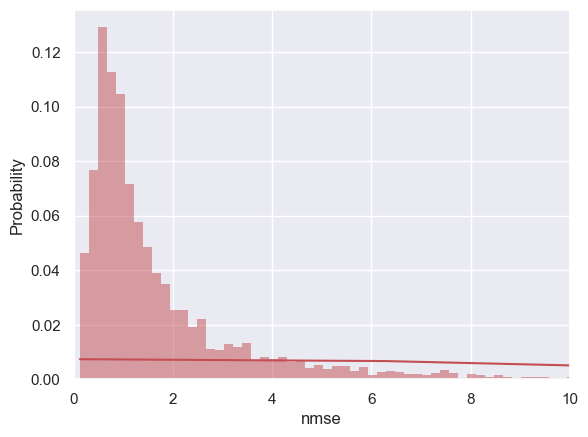

In [41]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [42]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [43]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [44]:
df[(df["nmse"] == 1)].shape[0]

0

In [45]:
df.shape

(4362, 4)

In [46]:
df.describe()

,nmse,round
count,4362.000000,4362.0
mean,4.410226,60.0
std,50.629150,0.0
min,0.124900,60.0
25%,0.667225,60.0
50%,1.109500,60.0
75%,2.151750,60.0
max,1226.000000,60.0


In [47]:
n_part = df["from_addr"].nunique()
nmse_ = df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"].values[0]
ranking = df[df["nmse"] < nmse_]["from_addr"].nunique() + 1
print(f"ROUND # {n_round}")
print("nmse : , ", nmse_)
print(f'RANKING :  {ranking} / {n_part}')
print(f"Top {round(100*ranking/n_part,2)} % ")

ROUND # 60
nmse : ,  9.4689998627
RANKING :  4271 / 4362
Top 97.91 % 
